In [1]:
# KNN Classification
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Zoo.csv')


In [8]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [9]:
df.tail()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [11]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [14]:
df['animal name'].value_counts()


animal name
frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: count, Length: 100, dtype: int64

#### Visualization 

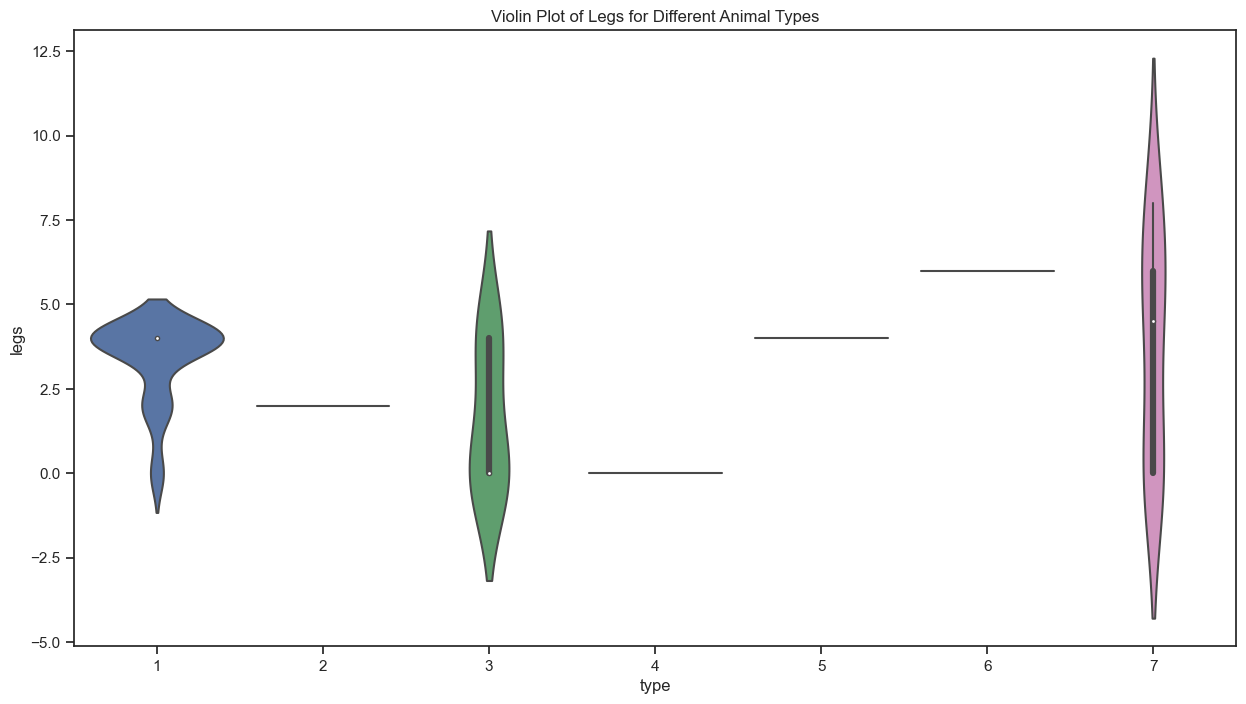

In [54]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='type', y='legs', data=df)
plt.title('Violin Plot of Legs for Different Animal Types')
plt.show()


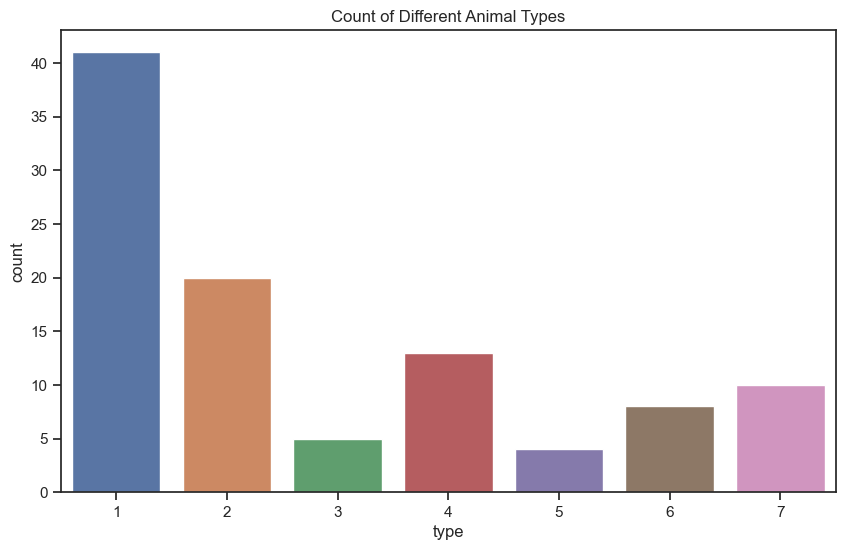

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df)
plt.title('Count of Different Animal Types')
plt.show()


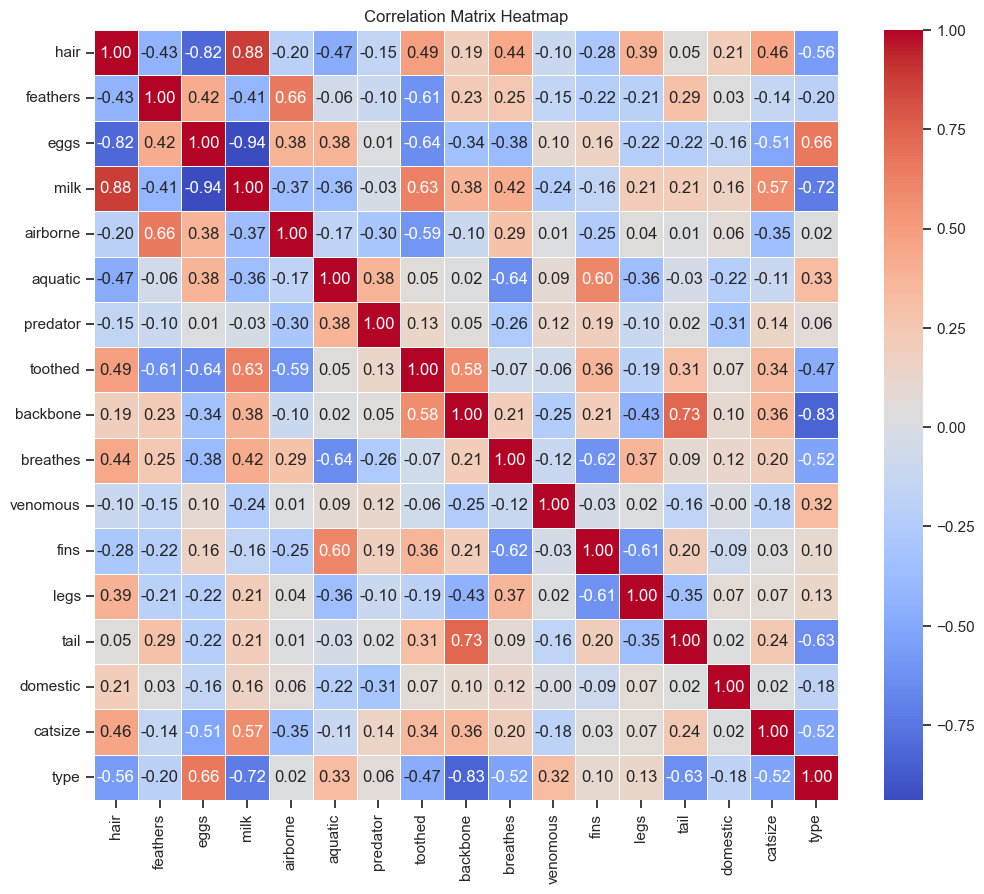

In [17]:
# Drop the 'animal name' column
df_numeric = df.drop('animal name', axis=1)

# Correlation matrix heatmap
corr_matrix = df_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
X = df.drop(['animal name', 'type'], axis=1)
y = df['type']
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5) 
fit = rfe.fit(X, y)
selected_features = X.columns[fit.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['feathers', 'milk', 'toothed', 'backbone', 'breathes'], dtype='object')


#### KNN classifier


In [60]:
#KNN Classification
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


In [21]:
X = df.drop(['animal name', 'type'], axis=1)
y = df['type']

In [62]:
x_train,x_test,y_train,y_test= train_test_split(X,y, test_size=0.3,random_state=45)


In [63]:
num_folds = 10
kfold = KFold(n_splits=10)

In [64]:
model = KNeighborsClassifier(n_neighbors=17)
model.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=17)

In [65]:
print(results.mean())

0.78


In [66]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() 

1    12
2    10
4     7
6     2
Name: count, dtype: int64

In [67]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.83      0.83      0.83        12
           2       1.00      1.00      1.00        10
           3       0.00      0.00      0.00         2
           4       0.43      1.00      0.60         3
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         2

    accuracy                           0.81        31
   macro avg       0.54      0.64      0.57        31
weighted avg       0.75      0.81      0.77        31



In [68]:
print("Accuracy", accuracy_score(y_test,preds)*100)


Accuracy 80.64516129032258


In [69]:
model.score(x_train,y_train)


0.7714285714285715

#### Grid Search for Algorithm Tuning

In [27]:
X = df.drop(['animal name', 'type'], axis=1)
y = df['type']

In [32]:
n_neighbors = numpy.array(range(1,50))
param_grid = dict(n_neighbors=n_neighbors)

In [33]:
model2 = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, y)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=17),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [34]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


#### Visualizing the CV results

In [51]:
k_range = range(1, 40)
k_scores = []

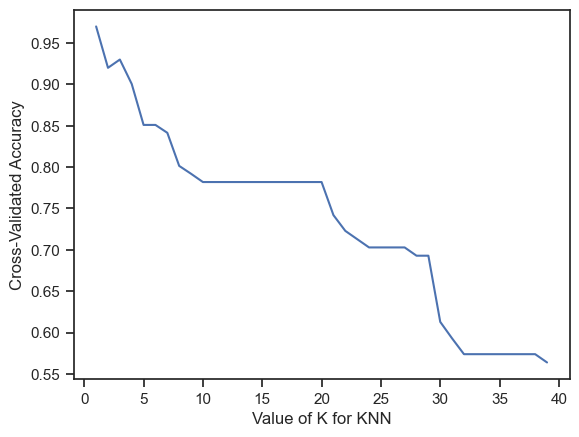

In [52]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()